In [5]:
# 데이터 
A_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
A_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

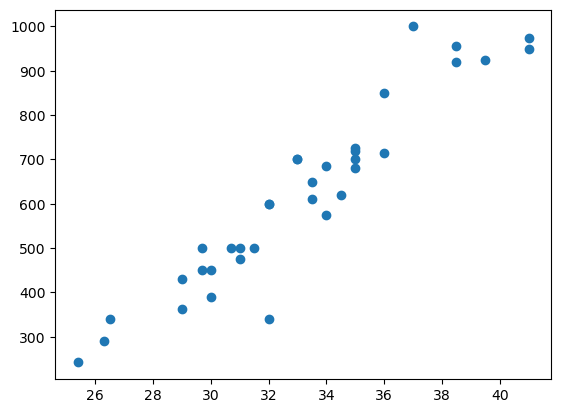

In [6]:
import matplotlib.pyplot as plt
plt.scatter(A_length,A_weight)
plt.show()

In [4]:
B_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
B_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

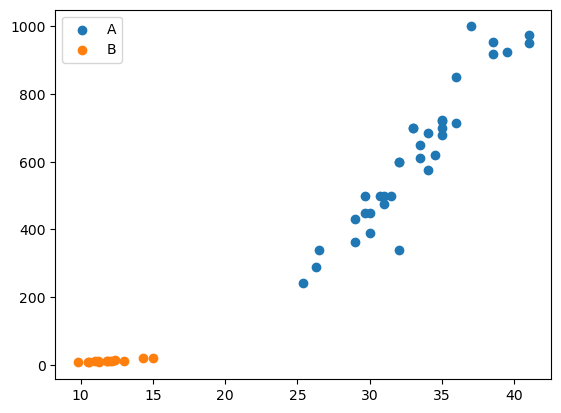

In [8]:
plt.scatter(A_length,A_weight,label='A')
plt.scatter(B_length, B_weight, label='B')
plt.legend()
plt.show()

In [13]:
length = A_length + B_length
weight = A_weight + B_weight
X = [[a,b] for a,b in zip(length,weight)]
y = [1]*len(A_length) + [0]*len(B_length)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()
knn.fit(X , y )
knn.score(X , y)

1.0

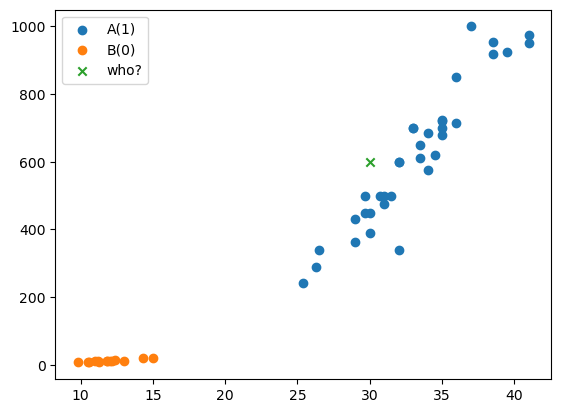

In [20]:
# (30,600) 일때 이것은 과연 어느 그룹인가?

plt.scatter(A_length,A_weight,label='A(1)')
plt.scatter(B_length, B_weight, label='B(0)')
plt.scatter(30,600,label = 'who?',marker = 'x')
plt.legend()
plt.show()

In [22]:
knn.predict( [[30,600]]  )

array([1])

In [24]:
knn = KNeighborsClassifier(n_neighbors=len(X))
knn.fit(X,y)
knn.score(X,y)

0.7142857142857143

In [26]:
len(A_length) / len(X)

0.7142857142857143

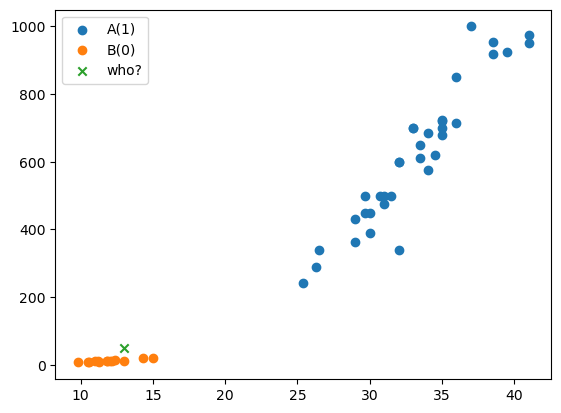

In [30]:
plt.scatter(A_length,A_weight,label='A(1)')
plt.scatter(B_length, B_weight, label='B(0)')
plt.scatter(13,50,label = 'who?',marker = 'x')
plt.legend()
plt.show()

In [31]:
knn.predict([[13,50]])

array([1])

In [52]:
# 분할 7:3  
split_num = int(len(X)*0.7)
X_train, y_train = X[: split_num], y[ : split_num]
X_test, y_test = X[split_num : ], y[ split_num : ]

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.06666666666666667)

In [54]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([1]), array([34]))

In [55]:
# 데이터 섞기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,stratify=y)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
knn.score(X_train,y_train),  knn.score(X_test, y_test)

(1.0, 1.0)

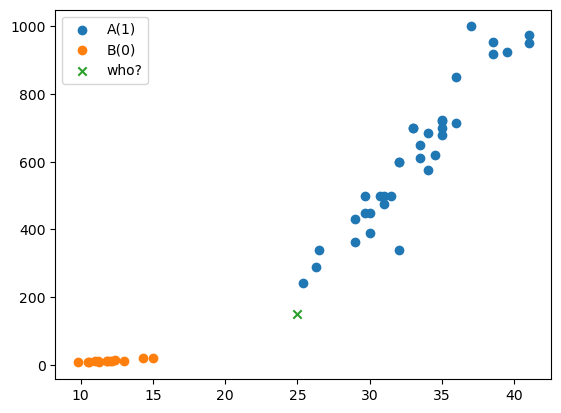

In [57]:
plt.scatter(A_length,A_weight,label='A(1)')
plt.scatter(B_length, B_weight, label='B(0)')
plt.scatter(25,150,label = 'who?',marker = 'x')
plt.legend()
plt.show()

In [58]:
knn.predict([[25,150]])

array([0])

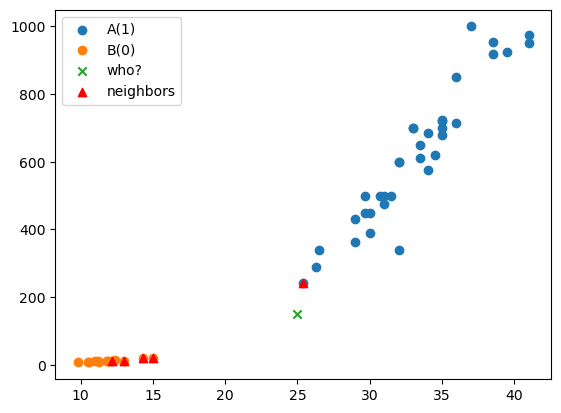

In [70]:
distances, indexs = knn.kneighbors([[25,150]])
plt.scatter(A_length,A_weight,label='A(1)')
plt.scatter(B_length, B_weight, label='B(0)')
plt.scatter(25,150,label = 'who?',marker = 'x')
plt.scatter(np.array(X_train)[indexs,0],np.array(X_train)[indexs,1],
            label = 'neighbors',marker = '^',color='red')
plt.legend()
plt.show()